# Jupyter notebook that repeats the 3D PIV test with visualizations

In [1]:
# %load ../../test/3D_test/PIV_3D_test.py
# by Andreas Bauer, 19.06.2020
# This script contains a series of tests for 3D-PIV: The shift of a bar in one direction, the expansion of a 3D block
# and a real data set where we recorded two stacks of collagen fibres at the same field of view with confocal microscopy
#  in reflection mode.  One stack contains a NK cell that deforms the matrix and the other doe not.
# Please download the data at https://github.com/fabrylab/3D_piv_example_data.git (180 MB, unpacked) and provide the
# folder in the code below.
# We tested this on ubuntu 16 and 18, with Anaconda Python installation. The whole script
# takes about 5 minutes on my 4 core-intel i5 @2.5 GHz Laptop. You should have !!! 8 Gb ob Memory !!!! or take care not
# to open  all matplotlib plots as interactive windows at once.
# For questions contact andreas.b.bauer@fau.de


from openpiv.pyprocess3D import *
from openpiv.PIV_3D_plotting import *
from openpiv.validation import sig2noise_val
from openpiv.filters import replace_nans_py, replace_outliers
import time
import glob as glob
import os
from natsort import natsorted
import matplotlib.animation as animation

/Users/alexliberzon/miniconda3/envs/openpiv-3d/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/Users/alexliberzon/miniconda3/envs/openpiv-3d/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/Users/alexliberzon/miniconda3/envs/openpiv-3d/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


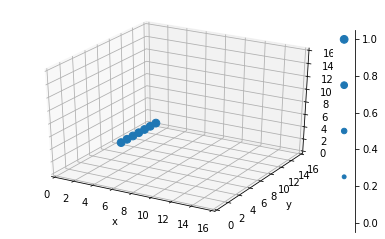

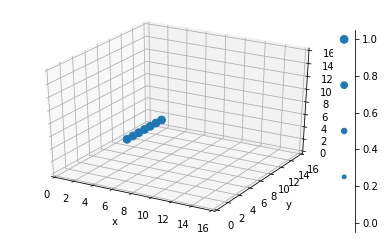

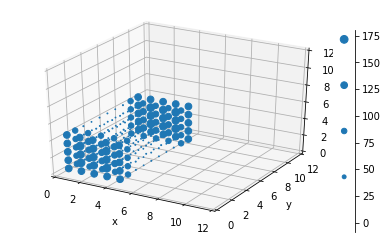

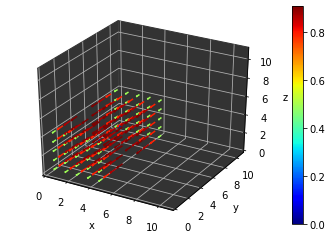

In [2]:
############# a bar sifted by 1 pixel to the right the second frame #############
# takes ~4 seconds

size = (16, 16, 16)
shape1 = np.zeros(size)
shape2 = np.zeros(size)
shape1[5, 3:10, 5] = 1
shape2[5, 4:11, 5] = 1

window_size = (5, 5, 5)
overlap = (4, 4, 4)
search_area = (5, 5, 5)

u, v, w, sig2noise = extended_search_area_piv3D(shape1, shape2, window_size=window_size, overlap=overlap,
                                                search_area_size=search_area, subpixel_method='gaussian',
                                                sig2noise_method='peak2peak', corr_method="fft",
                                                width=2)

# displaying the shapes with 3D scatter plot
fig1 = scatter_3D(shape1, control="size")
fig2 = scatter_3D(shape2, control="size")
# 3d plot of the signal-to-noise rations
fig3 = scatter_3D(sig2noise, control="size")
# 3d quiver plot of the displacement field
fig4 = quiver_3D(-u, v, w)

/Users/alexliberzon/Documents/repos/openpiv-python-3d/openpiv/pyprocess3D.py:237: RuntimeWarning: invalid value encountered in double_scalars
  peak1_i + ((np.log(cl) - np.log(cr)) / (2 * np.log(cl) - 4 * np.log(c) + 2 * np.log(cr))),
/Users/alexliberzon/Documents/repos/openpiv-python-3d/openpiv/pyprocess3D.py:238: RuntimeWarning: invalid value encountered in double_scalars
  peak1_j + ((np.log(cd) - np.log(cu)) / (2 * np.log(cd) - 4 * np.log(c) + 2 * np.log(cu))),
/Users/alexliberzon/Documents/repos/openpiv-python-3d/openpiv/pyprocess3D.py:239: RuntimeWarning: invalid value encountered in double_scalars
  peak1_z + ((np.log(cf) - np.log(cb)) / (2 * np.log(cf) - 4 * np.log(c) + 2 * np.log(cb)))
/Users/alexliberzon/Documents/repos/openpiv-python-3d/openpiv/PIV_3D_plotting.py:145: RuntimeWarning: invalid value encountered in greater
  mask_filtered = deformation > filter_def


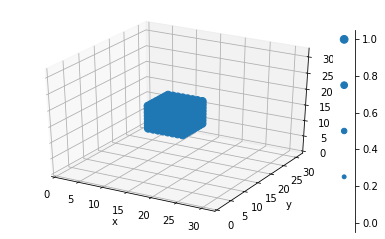

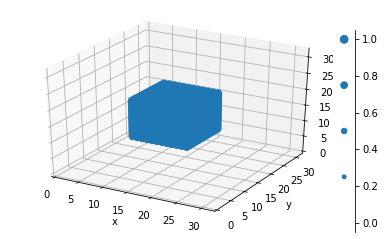

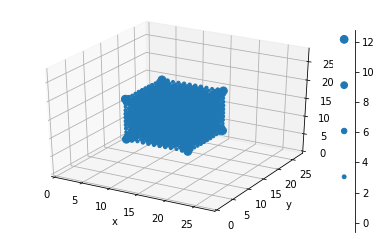

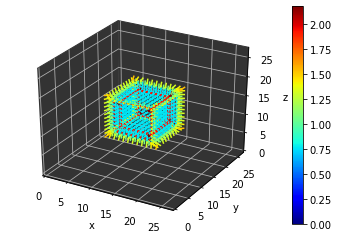

In [3]:
############# a square that is expanded by 2 pixels ################
# takes ~4 seconds

center = 16
size = (32, 32, 32)
d1 = 4
d2 = 6
shape1 = np.zeros(size)
shape1[center - d1:center + d1, center - d1:center + d1, center - d1:center + d1] = 1
shape2 = np.zeros(size)
shape2[center - d2:center + d2, center - d2:center + d2, center - d2:center + d2] = 1

window_size = (5, 5, 5)
overlap = (4, 4, 4)
search_area = (5, 5, 5)

u, v, w, sig2noise = extended_search_area_piv3D(shape1, shape2, window_size=window_size, overlap=overlap,
                                                search_area_size=search_area, subpixel_method='gaussian',
                                                sig2noise_method='peak2peak', corr_method="fft",
                                                width=2)

# displaying the shapes with 3D scatter plot
fig5 = scatter_3D(shape1, control="size")
fig6 = scatter_3D(shape2, control="size")

# 3d plot of the signal-to-noise rations
fig7 = scatter_3D(sig2noise, control="size")
# 3d quiver plot of the displacement field
fig8 = quiver_3D(-u, v, w)

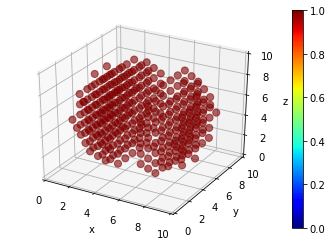

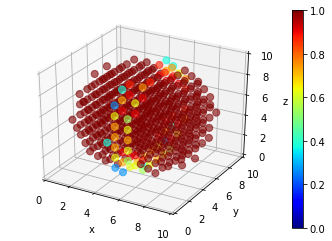

In [4]:
#################### test to check the replace_nans_function ######################
# takes ~4 seconds

# ball shape with a gap of nans in the middle
center = (5, 5, 5)
size = (10, 10, 10)
distance = np.linalg.norm(np.subtract(np.indices(size).T, np.asarray(center)), axis=len(center))
arr = np.ones(size) * (distance <= 5)
hide = arr == 0
arr[5:7] = np.nan

# displaying in 3d plots. Values outside of the original ball are hidden by setting to nan
arr_show = arr.copy()
arr_show[hide] = np.nan
fig9 = scatter_3D(arr_show, size=50, sca_args={"alpha": 0.6})
# replacing outliers
arr = replace_nans_py(arr, max_iter=2, tol=2, kernel_size=2, method='disk')

# displaying in 3d plots. Values outside of the original ball are hidden by setting to nan
arr_show = arr.copy()
arr_show[hide] = np.nan
fig10 = scatter_3D(arr_show, size=50, sca_args={"alpha": 0.6})

In [5]:
#####################

In [6]:
###### real data example ############################
# we recorded stacks of collagen fibres with confocal microscopy in reflection mode
# "alive" stack contains a force generating NK-cell, marked by the red circle in the animation
# "relaxed" stack is the same field of view with out the cell
# download the data at https://github.com/fabrylab/3D_piv_example_data.git
# this calculation takes takes ~ 3-4 minutes on my 4-core Intel i5@2.5 GHz Laptop


import git 
repo = git.Repo.clone_from("https://github.com/fabrylab/3D_piv_example_data.git", './test_3d', branch='master')

### plese enter the path to the dataset provided at
folder = r"test_3d"



if not os.path.exists(folder):
    raise FileNotFoundError("path to 3d piv data '%s' does not exists\n"
                            ". Please download the data from https://github.com/fabrylab/3D_piv_example_data.git" % folder)
# stack properties
# factors for voxel size
du = 0.2407
dv = 0.2407
dw = 1.0071
# total image dimension for x y z
image_dim = (123.02, 123.02, 122.86)

# keep these values for our nk cells stacks
win_um = 12  # window size in µm
fac_overlap = 0.3  # overlap in percent of the window size
signoise_filter = 1.3

# window size for stacks in pixel
window_size = (int(win_um / du), int(win_um / dv), int(win_um / dw))
overlap = (int(fac_overlap * win_um / du), int(fac_overlap * win_um / dv), int(fac_overlap * win_um / dw))
search_area = (int(win_um / du), int(win_um / dv), int(win_um / dw))

# load tense stacks
images = natsorted(glob.glob(os.path.join(folder, "Series001_t22_z*_ch00.tif")))
im_shape = plt.imread(images[0]).shape
alive = np.zeros((im_shape[0], im_shape[1], len(images)))
for i, im in enumerate(images):
    alive[:, :, i] = plt.imread(im)

# load relaxed stack
images = natsorted(glob.glob(os.path.join(folder, "Series003_t05_z*_ch00.tif")))
im_shape = plt.imread(images[0]).shape
relax = np.zeros((im_shape[0], im_shape[1], len(images)))
for i, im in enumerate(images):
    relax[:, :, i] = plt.imread(im)

# 3D PIV
u, v, w, sig2noise = extended_search_area_piv3D(alive, relax, window_size=window_size, overlap=overlap,
                                                search_area_size=search_area, dt=(1 / du, 1 / dv, 1 / dw),
                                                subpixel_method='gaussian',
                                                sig2noise_method='peak2peak',
                                                width=2)

# correcting stage drift between the field of views
u -= np.nanmean(u)
v -= np.nanmean(v)
w -= np.nanmean(w)

# filtering
uf, vf, wf, mask = sig2noise_val(u, v, w=w, sig2noise=sig2noise, threshold=signoise_filter)
uf, vf, wf = replace_outliers(uf, vf, wf, max_iter=1, tol=100, kernel_size=2, method='disk')


# plotting
# representation of the image stacks by maximums projections. The red circle marks the position of the cell
def update_plot(i, ims, ax):
    a1 = ax.imshow(ims[i])
    a2 = ax.add_patch(plt.Circle((330, 140), 100, color="red", fill=False))
    return [a1, a2]


ims = [np.max(relax[:, :, 60:], axis=2), np.max(alive[:, :, 60:], axis=2)]
fig = plt.figure()
ax = plt.gca()
ani = animation.FuncAnimation(fig, update_plot, 2, interval=50, blit=True, repeat_delay=0, fargs=(ims, ax))

GitCommandError: Cmd('git') failed due to: exit code(128)
  cmdline: git clone --branch=master -v https://github.com/fabrylab/3D_piv_example_data.git ./test_3d
  stderr: 'fatal: destination path './test_3d' already exists and is not an empty directory.
'

In [ ]:
# unfiltered 3d deformation field
fig11 = quiver_3D(-u, v, w, image_dim=image_dim, quiv_args={"length": 20, "alpha": 0.5, "linewidth": 2}, filter_def=0.1)

# filtered 3d deformation field
fig12 = quiver_3D(-uf, vf, wf, image_dim=image_dim, quiv_args={"length": 20, "alpha": 0.5, "linewidth": 2},
                  filter_def=0.1)